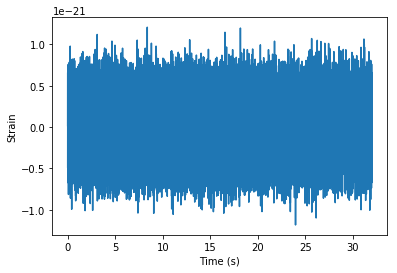

In [10]:
import pycbc.noise
import pycbc.psd
import pylab
import numpy as np

# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 32 seconds of noise at 4096 Hz
seed = np.random.randint(1024) # Generate a random number
delta_t = 1.0 / 4096
tsamples = int(32 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=seed)

pylab.plot(ts.sample_times, ts)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.show()

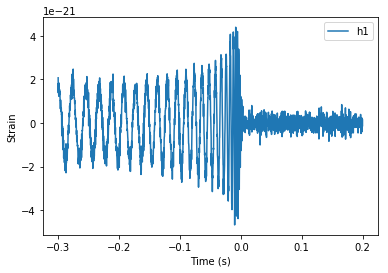

In [11]:
import matplotlib.pyplot as plt  # Import figure plot package
from pycbc.waveform import get_td_waveform # Import the time domain waveform generation function from PyCBC
hp, hc = get_td_waveform(approximant='IMRPhenomPv2', # Use a Post-Neutonian approximant -- IMRPhenomPv2    
                         mass1=20, 
                         mass2=20,
                         spin1z=0.9,
                         spin2z=0.9,
                         distance = 100,
                         delta_t=1.0/4096, # Sample frequency = 4096Hz
                         f_lower=40 # High pass filter
                         )
ts.resize(len(hp))

noisy = np.array(hp) + np.array(ts)
plt.plot(hp.sample_times[-2048:], # X cordinate: Sample time
         noisy[-2048:], # Y cordinate: Amplitude of plus polarization
         label='h1'
         )
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()